The SPARKS FOUNDATION
#**#GRIPJULY22**
####**Data Science and Business Analytics Internship**

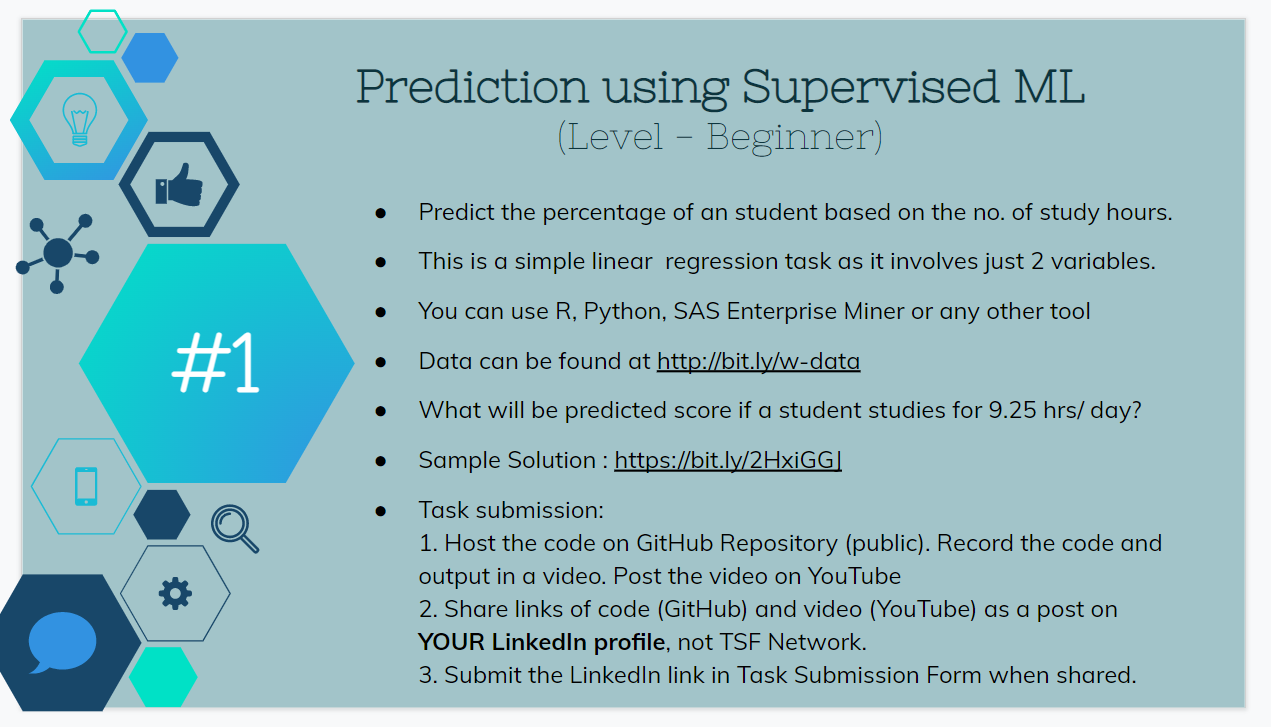
**Name :** Priyanka Vijay Patankar

**Task 1 :** Prediction using supervised ML

**Aim :** Predict the percentage of a student based on the number of study hours



---


#Importing the Libraries

In [18]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#Importing the Dataset

In [19]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Data Exploration

In [20]:
#Check the shape of the data
data.shape

(25, 2)

In [21]:
#Check the Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [22]:
#Check the description of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Data Visualization

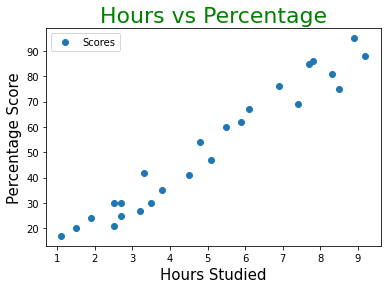

In [23]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage', color="green", size=22)  
plt.xlabel('Hours Studied',size=15)  
plt.ylabel('Percentage Score', size=15)  
plt.show()


We can clearly see that there is a positive linear relation between the number of hours studied and percentage of student.

#Data Preparation

In [24]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
print("Data is successfully divided into attributes and labels")
print("X is independent variable and Y is dependant variable")

Data is successfully divided into attributes and labels
X is independent variable and Y is dependant variable


#Splitting the data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
X_test.shape

(5, 1)

# Training the model

In [26]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed!")

Training completed!


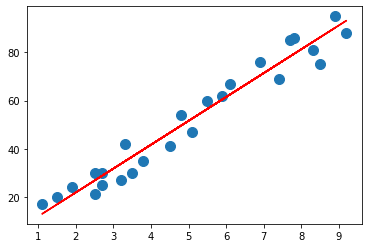

In [27]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, s=100)
plt.plot(X, line, color="red");
plt.show()

# Making Predictions

In [28]:
# Predicting the scores 
y_pred = regressor.predict(X_test)
#predicted output
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [29]:
#Actual Output
y_test


array([20, 27, 69, 30, 62])

# Predicted score if a student studies for 9.25 hrs/day

In [30]:
hour = np.array([9.25])
score = regressor.predict(hour.reshape(-1, 1))
print("No. of study hours: {0} and Score : {1}". format(hour, score))


No. of study hours: [9.25] and Score : [93.69173249]


In [31]:
m = regressor.coef_
c = regressor.intercept_
print("Coefficiet : {0} and Intercept : {1}".format(m, c))

Coefficiet : [9.91065648] and Intercept : 2.018160041434662


In [32]:
# y = m*x + c
score = m*(9.25) + c
score

array([93.69173249])

# Evaluating the model

In [33]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.183859899002982


In [34]:
#Identify the accuracy
regressor.score(X, y)

0.9526947647057273

#**This means our model is 95.26% accurate for the given dataset.**